Mini-Project Motorway Madness 2
<br>velocity and position in seperate arrays

In [87]:
import numpy as np
import matplotlib.pyplot as plt

Initial setup for one lane system:

In [88]:
leng= 200
lanes= 3
objects= 70
p=0.25 #probability of dawdling
#can be changed

In [89]:
vmin=3 #universal minimum initial velocity
bicyclemax=5
lorrymax=10
carmax=15

In [90]:
vel= np.zeros(objects) #base array for velocities of inputted number of vehicles
vmax=np.zeros(objects)
vehicles=np.array([bicyclemax,lorrymax,carmax])

for i in range(len(vel)):
    vmax[i]=vehicles[np.random.randint(0,len(vehicles))]
    vel[i]=np.random.randint(vmin,vmax[i]+1) #pick random integer between vmin and vmax (vmax included)

In [91]:
positions= np.zeros([objects,2]) #base array for positions, an array of objects(number) arrays of length two where the second index in the arrays of length two is the lane.
    
for i in range(objects):
    space= leng/objects
    positions[i,0]=int(i*space)
    positions[i,1]=np.random.randint(1,lanes+1)

implementing rules:

In [92]:
def change(vel,pos,vmax):
    """implements the rules: if v<vmax and distance to next car>v+1, v increases by 1; and if driver at i sees driver at i+j,v, v=j-1. Then advances each vehicle by v sites.
    takes inputs of vel: an array of initial velocities and pos: an array of initial positions, vmax: array of maximum velocity for each vehicle
    will out put an array of new velocities and an array of new positions"""
    
    foundk=False
    foundl=False
    #changing lane to right
    for i in range(objects-1):
        for k in range(1,objects-i):
            if pos[i,1]==pos[i+k,1] and pos[i+k,0]-pos[i,0]<=vel[i] and pos[i,1]<lanes:
                foundk=True
                for l in range(1,objects-i):
                    if pos[i+l,1]==pos[i,1]+1 and pos[i+l,0]-pos[i,0]>vel[i]:
                        foundl=True
                        pos[i,1]+=1
                    if foundl==True:
                        foundl=False
                        break
            if foundk==True:
                foundk=False
                break
    #Changing lane to left           
    for i in range(objects-1):
        for k in range(1,objects-i):
            if pos[i,1]==pos[i+k,1] and pos[i+k,0]-pos[i,0]<=vel[i] and pos[i,1]>1:
                foundk=True
                for l in range(1,objects-i):
                    if pos[i+l,1]==pos[i,1]-1 and pos[i+l,0]-pos[i,0]>vel[i]:
                        foundl=True
                        pos[i,1]-=1
                    if foundl==True:
                        foundl=False
                        break
            if foundk==True:
                foundk=False
                break
                  
    #changing velocity array
    foundj=False
    for i in range(objects-1):
        for j in range(0,objects-i):
            if pos[i,1]==pos[i+j,1] and vel[i]<vmax[i] and pos[i+j,0]-pos[i,0]>vel[i]+1:
                foundj=True
                vel[i] +=1
            elif pos[i,1]==pos[i+j,1] and pos[i+j,0]-pos[i,0]<=vel[i]:
                foundj=True
                vel[i]= pos[i+1,0]-pos[i,0] -1
            if foundj==True:
                foundj=False
                break
            
        num=np.random.random() #picking a random value between 0 and 1
        if num<=p and vel[i]>0:
            vel[i]-=1
            
    
    #below is for the first vehicle in each lane
    firstcarindex=np.zeros(lanes)
    lastcarindex=np.zeros(lanes)
    for i in range(lanes): #i=0,1,2
        if len(np.where(pos[:,1]==i+1)[0])>0:
            firstcarindex[i]=np.min(np.where(pos[:,1]==i+1)) #gives index of first car in each lane
            lastcarindex[i]=np.max(np.where(pos[:,1]==i+1))#gives index of last car in each lane
        
            if vel[int(lastcarindex[i])]<vmax[int(lastcarindex[i])] and pos[int(firstcarindex[i]),0]-pos[int(lastcarindex[i]),0]+leng>vel[int(lastcarindex[i])]+1:
                vel[int(lastcarindex[i])] +=1
            elif pos[int(firstcarindex[i]),0]-pos[int(lastcarindex[i]),0]+leng<=vel[int(lastcarindex[i])]:
                vel[int(lastcarindex[i])]= pos[int(firstcarindex[i]),0]-pos[int(lastcarindex[i]),0]+leng -1
            
    num=np.random.random() #picking a random value between 0 and 1
    if num<=p:
        vel[objects-1]-=1 
    
    
    #changing position array
    for i in range(objects):
        pos[i,0]+= vel[i]
    
        if pos[i,0]>leng-1: #-1 because pos[i,0] counts from 0
            pos[i,0]-=leng #if the length of the track is exceeded take vehicle back to beginning of track
   
    #rolling position and velocity arrays so vehicles are in correct order:
    #creating structured array to us np.sort on column and sort the velocity array at the same time
    structuredarray=np.zeros(objects,dtype={'names':['position','lane','velocity','maxVelocity'],'formats':['i4','i4','i4','i4']})
    structuredarray['position']=pos[:,0]
    structuredarray['lane']=pos[:,1]
    structuredarray['velocity']=vel
    structuredarray['maxVelocity']=vmax
    #sorting structured array
    structuredarray = np.sort(structuredarray,order='position')
    #splitting back into usual arrays
    pos[:,0]=structuredarray['position']
    pos[:,1]=structuredarray['lane']
    vel=structuredarray['velocity']
    vmax=structuredarray['maxVelocity']
    
    return vel, pos, vmax

In [93]:
def basicplot(positions):
    """converts the positions array used for updating the simulation into an array more useful for plotting data.
    Inputs: positions: array of positions and lanes for each vehicle
    outputs: an array of length equal to the length of the road and width equal to the number of lanes, each element will be filled with either 0 or 1, representing empty or occupied"""
    
    array=np.zeros((leng,lanes))
    
    for i in range(objects):
        j=int(positions[i,0]) #position along length of road
        k=int(positions[i,1])-1 #lane (-1 to count from 0)
        
        array[j,k]=1
        
    return array

In [94]:
def velplot(positions,vel):
    """converts the positions and velocity arrays used for updating the simulation into an array more useful for plotting data.
    Inputs: positions: array of positions and lanes for each vehicle, vel:array of velocities for each vehicle
    outputs: an array of length equal to the length of the road and width equal to the number of lanes, each element will be filled with either 0 or a number, representing empty or occupied, the value of the number represents the velocity"""
    
    array=np.zeros((leng,lanes))
    
    for i in range(objects):
        j=int(positions[i,0]) #position along length of road
        k=int(positions[i,1])-1 #lane (-1 to count from 0)
        
        array[j,k]=vel[i] + 1 #+1 so vehicles with velocity 0 can still be seen
        
    return array

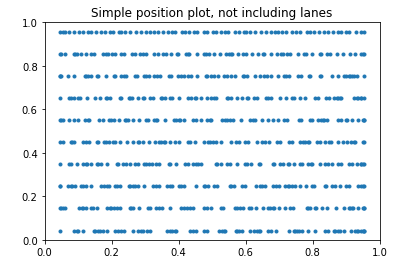

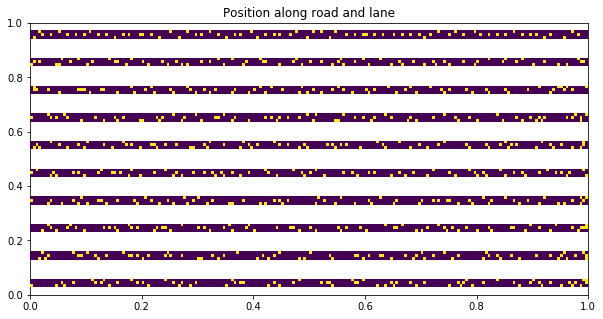

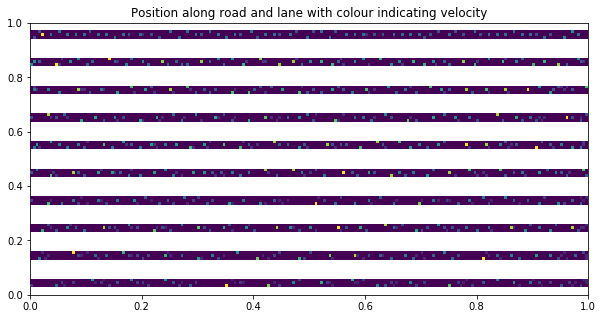

In [95]:
fig=plt.figure()
plt.title("Simple position plot, not including lanes")

figbasic=plt.figure(figsize=(10,5))
plt.title("Position along road and lane")

figvel=plt.figure(figsize=(10,5))
plt.title("Position along road and lane with colour indicating velocity")

index=1 #for subplots

for i in range(100):
    vel, positions, vmax = change(vel,positions,vmax)
    time=np.zeros(objects)
    time+=i
    
    #plots
    if i%10==0 or i==0:
        #lanes not shown
        ax=fig.add_subplot(10,1,index)
        ax.plot(positions[:,0],time,'.')
        ax.set_axis_off()
        
        #basic
        axbasic=figbasic.add_subplot(10,1,index)
        axbasic.imshow(basicplot(positions).T)
        axbasic.set_axis_off()
        
        #vel
        axvel=figvel.add_subplot(10,1,index)
        axvel.imshow(velplot(positions,vel).T)
        axvel.set_axis_off()
        
        index+=1
plt.show()

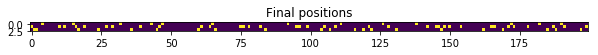

In [96]:
#final positions after 100 iterations
plot=basicplot(positions)

plt.figure(figsize=(10,15))
plt.imshow(plot.T)
plt.title("Final positions")
plt.show()

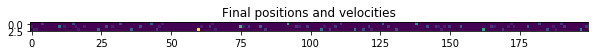

In [97]:
#final positions (and velocities) after 100 iterations
velplot=velplot(positions,vel)

plt.figure(figsize=(10,15))
plt.title("Final positions and velocities")
plt.imshow(velplot.T)
plt.show()

This is the completed, final system for different maximum velocities.